# Sentiment Analysis

The process of computationally identifying and categorizing opinions expressed in a piece of text, especially in order to determine whether the writer's attitude towards a particular topic, product, etc. is positive, negative, or neutral.The Sentiment Analysis is done using a Recurrent Neural Network called LSTM (Long Short Term Memory). Unlike standard feedforward neural networks, LSTM has feedback connections that make it a "general purpose computer" (that is, it can compute anything that a Turing machine can).It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition or speech recognition. 
![LSTM](https://cdn-images-1.medium.com/max/1600/0*LyfY3Mow9eCYlj7o.)

In [1]:

from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 
import pandas as pd
import re
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Only keeping the necessary columns.

In [2]:
data = pd.read_csv('Sentiment.csv')
# Keeping only the neccessary columns
data = data[['text','sentiment']]

Data Visualization

In [3]:
def word_cloud(tweets):
    #We get the directory that we are working on
    x, y = np.ogrid[:300, :300]
    mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
    mask = 255 * mask.astype(int)
    #We read the mask image into a numpy array
    #avengers_mask = np.array(Image.open(os.path.join(file, "avengers.png")))
    #We generate the wordcloud using the series created and the mask 
    word_cloud = WordCloud(width=2000, height=1000, max_font_size=200, 
                           background_color="black", max_words=2000, mask=mask, 
                           contour_width=1, contour_color="steelblue", 
                           colormap="nipy_spectral").generate(tweets)

    #Now we plot the figure
    plt.figure(figsize=(10,10))
    plt.imshow(word_cloud, interpolation="hermite")
    plt.axis("off")    
    plt.show()   

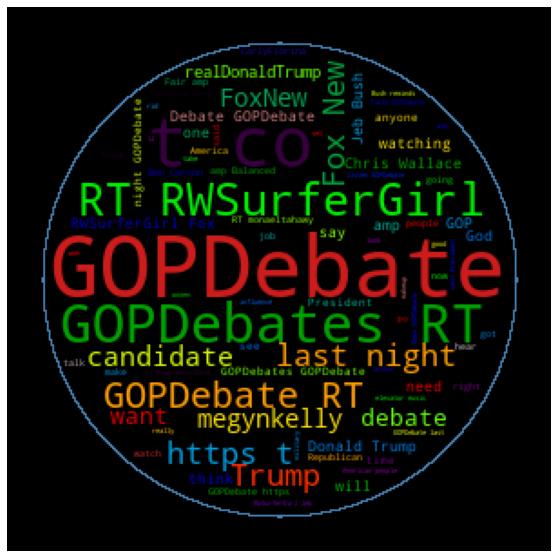

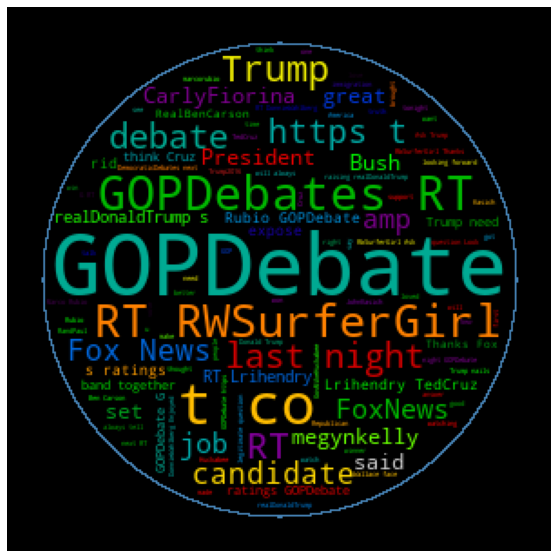

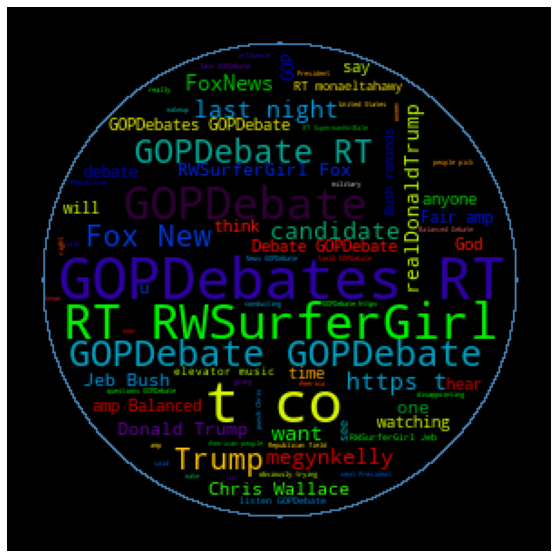

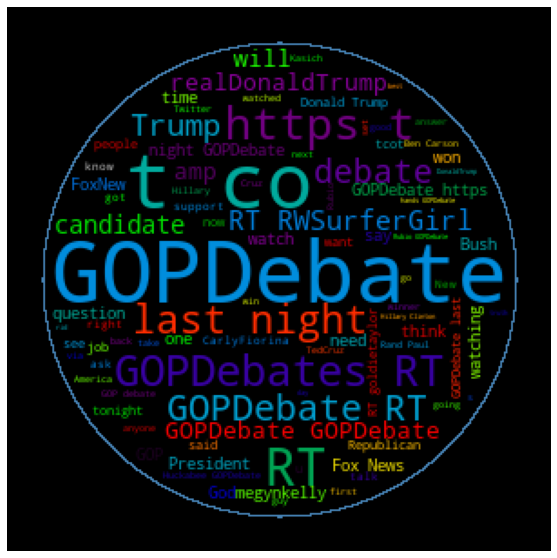

In [4]:
if __name__ == "__main__":    
    #First we draw a word cloud
    #For All tweets
    word_cloud(pd.Series([t for t in data.text]).str.cat(sep=' '))    
    #For positive tweets 
    word_cloud(pd.Series([t for t in data[ data['sentiment'] == 'Positive'].text]).str.cat(sep=' '))   
    #For negative tweets
    word_cloud(pd.Series([t for t in data[ data['sentiment'] == 'Negative'].text]).str.cat(sep=' '))
    #For neutral tweets
    word_cloud(pd.Series([t for t in data[ data['sentiment'] == 'Neutral'].text]).str.cat(sep=' '))

In [5]:
def graph(word_frequency, sent):
    labels = word_frequency[0][1:51].index
    title = "Word Frequency for %s" %sent
    #Plot the figures
    plt.figure(figsize=(10,5))
    plt.bar(np.arange(50), word_frequency[0][1:51], width = 0.8, color = sns.color_palette("bwr"), alpha=0.5, 
            edgecolor = "black", capsize=8, linewidth=1);
    plt.xticks(np.arange(50), labels, rotation=90, size=14);
    plt.xlabel("50 more frequent words", size=14);
    plt.ylabel("Frequency", size=14);
    #plt.title('Word Frequency for %s', size=18) %sent;
    plt.title(title, size=18)
    plt.grid(False);
    plt.gca().spines["top"].set_visible(False);
    plt.gca().spines["right"].set_visible(False);
    plt.show()

In [6]:
def regression_graph(table):
    table = table[1:]
    #We set the style of seaborn
    sns.set_style("whitegrid")   
    #Initialize the figure
    plt.figure(figsize=(6,6))
    
    #we obtain the points from matplotlib scatter
    points = plt.scatter(table["Positive"], table["Negative"], c=table["Positive"], s=75, cmap="bwr")
    #graph the colorbar
    plt.colorbar(points)
    #we graph the regplot from seaborn
    sns.regplot(x="Positive", y="Negative",fit_reg=False, scatter=False, color=".1", data=table)
    plt.xlabel("Frequency for Positive Tweets", size=14)
    plt.ylabel("Frequency for Negative Tweets", size=14)
    plt.title("Word frequency in Positive vs. Negative Tweets", size=14)
    plt.grid(False)
    sns.despine()

In [7]:
#Vectorization for Data Visualization
def vectorization(data):
    #CountVectorizer will convert a collection of text documents to a matrix of token counts
    #Produces a sparse representation of the counts 
    #Initialize
    vector = CountVectorizer()
    #We fit and transform the vector created
    frequency_matrix = vector.fit_transform(data.text)
    #Sum all the frequencies for each word
    sum_frequencies = np.sum(frequency_matrix, axis=0)
    #Now we use squeeze to remove single-dimensional entries from the shape of an array that we got from applying np.asarray to
    #the sum of frequencies.
    frequency = np.squeeze(np.asarray(sum_frequencies))
    #Now we get into a dataframe all the frequencies and the words that they correspond to
    frequency_df = pd.DataFrame([frequency], columns=vector.get_feature_names()).transpose()
    return frequency_df

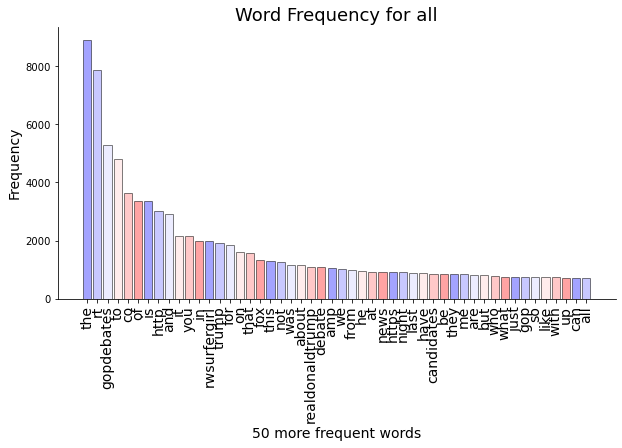

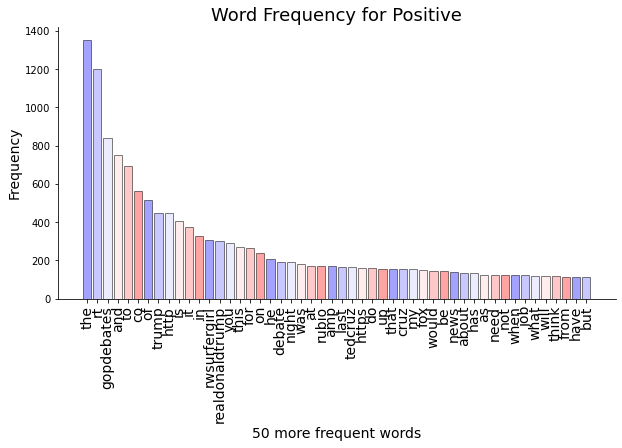

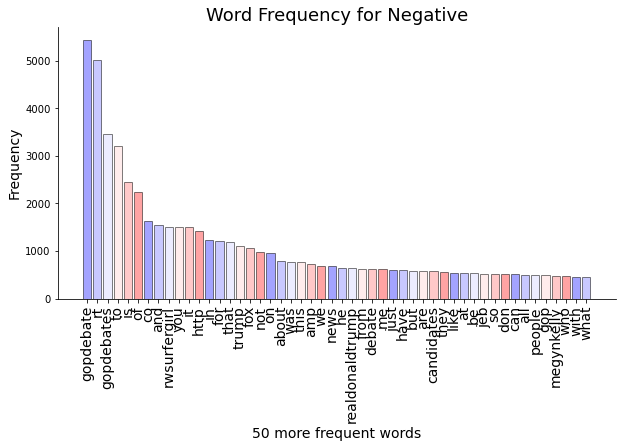

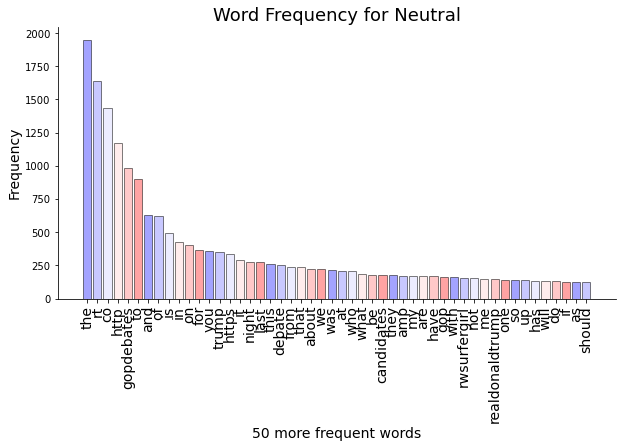

In [8]:
if __name__ == "__main__":
    #Get the frequency
    word_frequency = vectorization(data).sort_values(0, ascending = False)
    word_frequency_pos = vectorization(data[data['sentiment'] == 'Positive']).sort_values(0, ascending = False)
    word_frequency_neg = vectorization(data[data['sentiment'] == 'Negative']).sort_values(0, ascending = False)
    word_frequency_neu = vectorization(data[data['sentiment'] == 'Neutral']).sort_values(0, ascending = False)
    #Graph with frequency words all, positive and negative tweets and get the frequency
    graph(word_frequency, 'all')
    graph(word_frequency_pos, 'Positive')
    graph(word_frequency_neg, 'Negative')
    graph(word_frequency_neu, 'Neutral')

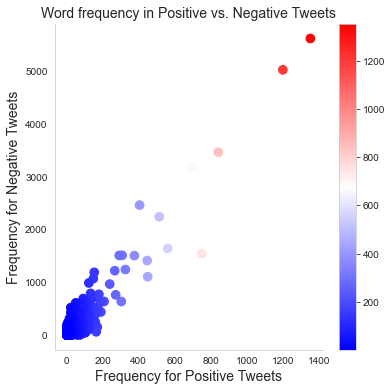

In [9]:
if __name__ == "__main__":
    #Concatenate word frequency for positive and negative
    data_regression = pd.concat([word_frequency_pos, word_frequency_neg], axis=1, sort=False)
    data_regression.columns = ["Positive", "Negative"]
    regression_graph(data_regression)

The Sentiments goal is to differentiate positive, neutral and negative tweets. I am filtering the tweets so only valid texts and words remain.  Then, I define the number of max features as 2000 and use Tokenizer to vectorize and convert text into Sequences so the Network can deal with it as input.

In [10]:
data['text'] = data['text'].apply(lambda x: x.lower())
data['text'] = data['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 'Positive'].size)
print(data[ data['sentiment'] == 'Negative'].size)
print(data[ data['sentiment'] == 'Neutral'].size)

4472
16986
6284


In [11]:
for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_features = 2000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

Next, I compose the LSTM Network. Note that **embed_dim**, **lstm_out**, **batch_size**, **droupout_x** variables are hyperparameters, their values are somehow intuitive, can be and must be played with in order to achieve good results. Please also note that I am using softmax as activation function. My Deep learning model is using categorical crossentropy, and softmax ctivation function since its multiclassification.

In [12]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 28, 128)           256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 28, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 3)                 591       
                                                                 
Total params: 511,391
Trainable params: 511,391
Non-trainable params: 0
_________________________________________________________________
None


Split the Onehot Encode the Sentiment and split the data

In [13]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9293, 28) (9293, 3)
(4578, 28) (4578, 3)


In [14]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 20, batch_size=batch_size, verbose = 1)

Epoch 1/20
291/291 [==============================] - 45s 111ms/step - loss: 0.8425 - accuracy: 0.6375
Epoch 2/20
291/291 [==============================] - 28s 97ms/step - loss: 0.7035 - accuracy: 0.6971
Epoch 3/20
291/291 [==============================] - 30s 102ms/step - loss: 0.6395 - accuracy: 0.7285
Epoch 4/20
291/291 [==============================] - 30s 103ms/step - loss: 0.5991 - accuracy: 0.7502
Epoch 5/20
291/291 [==============================] - 31s 106ms/step - loss: 0.5672 - accuracy: 0.7609
Epoch 6/20
291/291 [==============================] - 31s 105ms/step - loss: 0.5360 - accuracy: 0.7810
Epoch 7/20
291/291 [==============================] - 30s 104ms/step - loss: 0.5024 - accuracy: 0.7894
Epoch 8/20
291/291 [==============================] - 32s 110ms/step - loss: 0.4814 - accuracy: 0.8044
Epoch 9/20
291/291 [==============================] - 31s 106ms/step - loss: 0.4523 - accuracy: 0.8172
Epoch 10/20
291/291 [==============================] - 31s 106ms/step - lo

Extracting a validation set, and measuring score and accuracy.

In [15]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

97/97 - 8s - loss: 1.3597 - accuracy: 0.6387 - 8s/epoch - 87ms/step
score: 1.36
acc: 0.64


In [16]:
pos_cnt, neg_cnt, neutral_cnt, pos_correct, neg_correct, neutral_correct = 0, 0, 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        elif np.argmax(Y_validate[x]) == 1:
            neutral_correct += 1
        elif np.argmax(Y_validate[x]) == 2:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    elif np.argmax(Y_validate[x]) == 1:
        neutral_cnt += 1
    elif np.argmax(Y_validate[x]) == 2:
        pos_cnt += 1
            
print("neg_acc", neg_correct/neg_cnt*100, "%")
print("neutral_acc", neutral_correct/neutral_cnt*100, "%")
print("pos_acc", pos_correct/pos_cnt*100, "%")

1/1 - 1s - 670ms/epoch - 670ms/step
1/1 - 0s - 99ms/epoch - 99ms/step
1/1 - 0s - 49ms/epoch - 49ms/step
1/1 - 0s - 56ms/epoch - 56ms/step
1/1 - 0s - 57ms/epoch - 57ms/step
1/1 - 0s - 57ms/epoch - 57ms/step
1/1 - 0s - 42ms/epoch - 42ms/step
1/1 - 0s - 48ms/epoch - 48ms/step
1/1 - 0s - 51ms/epoch - 51ms/step
1/1 - 0s - 57ms/epoch - 57ms/step
1/1 - 0s - 49ms/epoch - 49ms/step
1/1 - 0s - 49ms/epoch - 49ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 48ms/epoch - 48ms/step
1/1 - 0s - 56ms/epoch - 56ms/step
1/1 - 0s - 49ms/epoch - 49ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 64ms/epoch - 64ms/step
1/1 - 0s - 50ms/epoch - 50ms/step
1/1 - 0s - 64ms/epoch - 64ms/step
1/1 - 0s - 40ms/epoch - 40ms/step
1/1 - 0s - 41ms/epoch - 41ms/step
1/1 - 0s - 57ms/epoch - 57ms/step
1/1 - 0s - 56ms/epoch - 56ms/step
1/1 - 0s - 48ms/epoch - 48ms/step
1/1 - 0s - 43ms/epoch - 43ms/step
1/1 - 0s - 70ms/epoch - 70ms/step
1/1 - 0s - 48ms/epoch - 48ms/step
1/1 - 0s - 49ms/epoch - 49ms/step
1/1 - 0s - 5

In [17]:
twt = ['Meetings: Because none of us is as dumb as all of us.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)

sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Negative")
elif (np.argmax(sentiment) == 1):
    print("Positive")
elif (np.argmax(sentiment) == 2):
    print("Neutral")    

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0  204  724    5  130    6   55 1101   55   48    5  130]]
1/1 - 0s - 40ms/epoch - 40ms/step
Positive


In [18]:
twt = ['This is quite bad.']
#vectorizing the tweet by the pre-fitted tokenizer instance
twt = tokenizer.texts_to_sequences(twt)
#padding the tweet to have exactly the same shape as `embedding_2` input
twt = pad_sequences(twt, maxlen=28, dtype='int32', value=0)
print(twt)
sentiment = model.predict(twt,batch_size=1,verbose = 2)[0]
if(np.argmax(sentiment) == 0):
    print("Negative")
elif (np.argmax(sentiment) == 1):
    print("Neutral")
elif (np.argmax(sentiment) == 2):
    print("Positive")    

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0  19   6 894 381]]
1/1 - 0s - 52ms/epoch - 52ms/step
Negative
